In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('whitegrid')

import plotly
plotly.offline.init_notebook_mode() 


# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
#%matplotlib notebook-----I would have loved to use this option but my PC is not bale to handle it.
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import pickle

The main hypothesis of this project is to use Machine Learning to attain efficient and precise prediction of bank failure in the USA. Using machine learning we can actually identify the features which can help us specify a model which has high prediction accuracy and minimum MSE.(Explained in more detail in the final report) 
The data used in this study contains the various accounting measures and financial ratios indicating the financial health of banks in US. This data is gathered from FDIC data set which can be found @ https://www5.fdic.gov/sdi/main.asp?formname=customddownload   

In [2]:
df = pd.read_pickle('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\bank_model_data.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779047 entries, 0 to 779046
Data columns (total 70 columns):
cert               779047 non-null int64
docket             779047 non-null int64
fed_rssd           779047 non-null int64
rssdhcr            779047 non-null int64
name               779047 non-null object
city               779047 non-null object
stalp              779047 non-null object
zip                779047 non-null int64
repdte             779047 non-null datetime64[ns]
rundate            779047 non-null datetime64[ns]
bkclass            779047 non-null object
address            779002 non-null object
namehcr            545202 non-null object
offdom             779047 non-null int64
offfor             779047 non-null int64
stmult             779047 non-null int64
specgrp            779047 non-null int64
subchaps           779047 non-null int64
county             779047 non-null object
cbsa_metro         442021 non-null float64
cbsa_metro_name    442021 non-null object


I am creating variavles for date and Year by using the following method. The reson for doing so is that the complete data set contains total 779046 number of observations, which takes a lot of time to process on my PC.

In [4]:
df['date'] = pd.to_datetime(df['repdte'])
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year
df.head(3)

,cert,docket,fed_rssd,rssdhcr,name,city,stalp,zip,repdte,rundate,...,rbc1aaj,rbc1rwaj,rbcrwaj,asset5,ernast5,eq5,lnlsgr5,date,month,year
0,15448,0,1006858,1495818,1st American State Bank of Minnesota,Hancock,MN,56244,1995-03-31,2016-08-04,...,10.503145,14.788740,15.851404,13625.0,12500.5,1378.5,8140.0,1995-03-31,3,1995
1,23309,11422,431743,1134322,1st Bank,West Branch,MI,48661,1995-03-31,2016-08-04,...,6.496904,9.199507,10.456037,85254.5,78699.5,5811.5,66411.5,1995-03-31,3,1995
2,16419,0,419255,1055780,1st Bank & Trust,Broken Bow,OK,74728,1995-03-31,2016-08-04,...,8.379969,12.762535,14.015484,48797.0,44047.0,3997.5,34831.5,1995-03-31,3,1995


I'll use data from January 2011 to December 2016. The data used for the purpose of this study has a frequency of Quarterly observations totalling to 24 quarters of coverage.

In [5]:
df5= df[(df.year > 2010)]

In [6]:
df5.head(3)

,cert,docket,fed_rssd,rssdhcr,name,city,stalp,zip,repdte,rundate,...,rbc1aaj,rbc1rwaj,rbcrwaj,asset5,ernast5,eq5,lnlsgr5,date,month,year
616695,57899,0,3317192,3370517,1st Advantage Bank,Saint Peters,MO,63376,2011-03-31,2017-02-21,...,82.886664,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011
616696,16522,0,888253,2003975,1ST BANK,Evanston,WY,82930,2011-03-31,2017-02-21,...,53.277749,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011
616697,22039,0,564856,1128415,1st Bank,Sidney,MT,59270,2011-03-31,2017-02-21,...,58.954996,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011


In [7]:
print df5.shape
print df5.info()

(162352, 73)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 73 columns):
cert               162352 non-null int64
docket             162352 non-null int64
fed_rssd           162352 non-null int64
rssdhcr            162352 non-null int64
name               162352 non-null object
city               162352 non-null object
stalp              162352 non-null object
zip                162352 non-null int64
repdte             162352 non-null datetime64[ns]
rundate            162352 non-null datetime64[ns]
bkclass            162352 non-null object
address            162352 non-null object
namehcr            120159 non-null object
offdom             162352 non-null int64
offfor             162352 non-null int64
stmult             162352 non-null int64
specgrp            162352 non-null int64
subchaps           162352 non-null int64
county             162352 non-null object
cbsa_metro         90320 non-null float64
cbsa_metro_name    90320 

Here I am dropping some common identifiers from the dataset which will not be used for Exploratory data analysis.

In [8]:
#dropping columns which are not required for the analysis
df5.drop([
        'docket',             
        'fed_rssd',           
        'rssdhcr',            
        'name',               
        'city',               
        'stalp',              
        'zip',                
        'repdte',             
        'rundate',            
        'bkclass',           
        'address',            
        'namehcr',            
        'stmult',             
        'specgrp',            
        'subchaps',           
        'county',             
        'cbsa_metro',         
        'cbsa_metro_name',    
        'estymd',             
        'insdate',            
        'effdate',            
        'mutual',             
        'parcert',            
        'trust',              
        'regagnt',            
        'insagnt1',           
        'fdicdbs',            
        'fdicsupv',           
        'fldoff',             
        'fed',                
        'occdist',            
        'otsregnm',           
        'webaddr',            
        'idntilr',            
        'idntigr'            


    ], axis = 1, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 38 columns):
cert        162352 non-null int64
offdom      162352 non-null int64
offfor      162352 non-null int64
intincy     0 non-null float64
intexpy     0 non-null float64
nimy        162114 non-null float64
noniiay     162114 non-null float64
nonixay     162114 non-null float64
noijy       162136 non-null float64
roa         162136 non-null float64
roaptx      162136 non-null float64
roe         162136 non-null float64
roeinjr     162136 non-null float64
ntlnlsr     162136 non-null float64
elnantr     162136 non-null float64
iderncvr    162136 non-null float64
eeffr       161118 non-null float64
astempm     146690 non-null float64
iddivnir    113883 non-null float64
lnatresr    162113 non-null float64
lnresncr    161798 non-null float64
nperfv      162047 non-null float64
nclnlsr     162136 non-null float64
lnlsntv     161061 non-null float64
lnlsdepr    149441 non-null float64


In [10]:
#before cleaning the columns I am renaming the columns so that it becomes easy to call spesific columns as an 
#when required
df5.rename(columns={
    'offdom' : 'no_domestic_branches',
    'offfor' : 'no_foreign_branches',
    'intincy' : 'yield_on_earning_assets',
    'intexpy' : 'cost_of_funding_earning_assets',
    'nimy' : 'net_interest_margin',
    'noniiay' : 'noninterest_income_to_avg_assets',
    'nonixay' : 'noninterest_expense_to_avg_assets',
    'noijy' : 'net_operating_income_to_assets',
    'roaptx' : 'pretax_roa',
    'roeinjr' : 'retained_earnings_to_avg_equity',
    'ntlnlsr' : 'net_charge_offs_to_loans',
    'elnantr' : 'credit_loss_provision_to_net_charge_offs',
    'iderncvr' : 'earnings_coverage_of_net_charge_offs',
    'eeffr' : 'efficiency_ratio',
    'astempm' : 'assets_per_employee_millions',
    'iddivnir' : 'cash_dividends_to_net_income',
    'lnatresr' : 'loss_allowance_to_loans',
    'lnresncr' : 'loan_loss_allowance_to_noncurrent_loans',
    'nperfv' : 'noncurrent_assets+other_real_estate_owned_to_assets',
    'nclnlsr' : 'noncurrent_loans_to_loans',
    'lnlsntv' : 'net_loans_and_leases_to_total_assets',
    'lnlsdepr' : 'net_loans_and_leases_to_deposits',
    'idlncorr' : 'net_loans_and_leases_to_core_deposits',
    'depdastr' : 'total_domestic_deposits_to_total_assets',
    'eqv' : 'equity_capital_to_assets',
    'rbc1aaj' : 'corecapital_leverage_ratio',
    'rbc1rwaj' : 't1_risk_based_capital_ratio',
    'rbcrwaj' : 'total_risk_based_capital_ratio',
    'asset5' : 'avg_total_assets',
    'ernast5' : 'avg_earning_assets',
    'eq5' : 'avg_equity',
    'lnlsgr5' : 'avg_total_loans'

    }, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 38 columns):
cert                                                   162352 non-null int64
no_domestic_branches                                   162352 non-null int64
no_foreign_branches                                    162352 non-null int64
yield_on_earning_assets                                0 non-null float64
cost_of_funding_earning_assets                         0 non-null float64
net_interest_margin                                    162114 non-null float64
noninterest_income_to_avg_assets                       162114 non-null float64
noninterest_expense_to_avg_assets                      162114 non-null float64
net_operating_income_to_assets                         162136 non-null float64
roa                                                    162136 non-null float64
pretax_roa                                             162136 non-null float64
roe                            

In [12]:
df5.drop([
          'yield_on_earning_assets',                                
          'cost_of_funding_earning_assets',           


    ], axis = 1, inplace=True)

                        

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



The data set named Failed is the list of Banks which failed during the time 2011-2016 which is obtained from
https://www.fdic.gov/bank/individual/failed/banklist.html
Banks belonging to this list has a value 1 in feature fail.

In [13]:
ff = pd.read_excel('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\Failed.xlsx')

In [14]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
cert    194 non-null int64
fail    194 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


In [15]:
ff.head(5)

,cert,fail
0,35495,1
1,19328,1
2,34951,1
3,91,1
4,11297,1


Now I am merging the list of failed banks with the data set on financial ratio's of banks to create a structured data set for further analysis.

In [16]:
df5 = pd.merge(df5, ff, on=['cert'], how='left')

In [17]:
#checking for missing values
df5.isnull().sum()

cert                                                        0
no_domestic_branches                                        0
no_foreign_branches                                         0
net_interest_margin                                       238
noninterest_income_to_avg_assets                          238
noninterest_expense_to_avg_assets                         238
net_operating_income_to_assets                            216
roa                                                       216
pretax_roa                                                216
roe                                                       216
retained_earnings_to_avg_equity                           216
net_charge_offs_to_loans                                  216
credit_loss_provision_to_net_charge_offs                  216
earnings_coverage_of_net_charge_offs                      216
efficiency_ratio                                         1234
assets_per_employee_millions                            15662
cash_div

In [18]:
df5.head(5)

,cert,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
0,57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,NaN
1,16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,NaN
2,22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,NaN
3,16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,NaN
4,30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,NaN


Since the banks which failed during the period of study has a value of one I'll replace the missing values for remaining banks with '0' resulting in creation of a binary variable taking value 1 if a bank failed else 0.

In [19]:
df5['fail'].fillna(0, inplace=True)

In [20]:
df5.head(5)

,cert,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
0,57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,0.0
1,16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,0.0
2,22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,0.0
3,16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,0.0
4,30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,0.0


Here I'm setting up the data by resetting the index to 'cert' which is an unique identifier number for each bank. By doing so I'll be able to replace the missing values by mean for a bank for a specific feature instead of replacing it by the mean of whole data set.

In [21]:
df1 = df5.set_index(['cert'])

In [22]:
df1.head(5)

,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,retained_earnings_to_avg_equity,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
cert,,,,,,,,,,,,,,,,,,,,,
57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,0.0
16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,0.0
22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,0.0
16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,0.0
30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,0.0


Since I have set 'cert' as an index I can replace the missing values for each bank by its mean using the groupby and tranform method. I have used a lambda function to transform the missing values to mean and done for features of interest.

In [23]:
#replacing missing values by mean of the group
df1['credit_loss_provision_to_net_charge_offs'] = df1.groupby(level=0)['credit_loss_provision_to_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['earnings_coverage_of_net_charge_offs'] = df1.groupby(level=0)['earnings_coverage_of_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['efficiency_ratio'] = df1.groupby(level=0)['efficiency_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['assets_per_employee_millions'] = df1.groupby(level=0)['assets_per_employee_millions'].transform( lambda x: x.fillna(x.mean()))
df1['loan_loss_allowance_to_noncurrent_loans'] = df1.groupby(level=0)['loan_loss_allowance_to_noncurrent_loans'].transform( lambda x: x.fillna(x.mean()))
df1['noncurrent_loans_to_loans'] = df1.groupby(level=0)['noncurrent_loans_to_loans'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_total_assets'] = df1.groupby(level=0)['net_loans_and_leases_to_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_deposits'] = df1.groupby(level=0)['net_loans_and_leases_to_deposits'].transform( lambda x: x.fillna(x.mean()))
df1['cash_dividends_to_net_income'] = df1.groupby(level=0)['cash_dividends_to_net_income'].transform( lambda x: x.fillna(x.mean()))
df1['roa'] = df1.groupby(level=0)['roa'].transform( lambda x: x.fillna(x.mean()))
df1['roe'] = df1.groupby(level=0)['roe'].transform( lambda x: x.fillna(x.mean()))
df1['corecapital_leverage_ratio'] = df1.groupby(level=0)['corecapital_leverage_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['total_risk_based_capital_ratio'] = df1.groupby(level=0)['total_risk_based_capital_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_assets'] = df1.groupby(level=0)['avg_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_earning_assets'] = df1.groupby(level=0)['avg_earning_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_equity'] = df1.groupby(level=0)['avg_equity'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_loans'] = df1.groupby(level=0)['avg_total_loans'].transform( lambda x: x.fillna(x.mean()))
df1['loss_allowance_to_loans'] = df1.groupby(level=0)['loss_allowance_to_loans'].transform( lambda x: x.fillna(x.mean()))


In [24]:
#checking for missing values
df1.isnull().sum()

no_domestic_branches                                      0
no_foreign_branches                                       0
net_interest_margin                                     238
noninterest_income_to_avg_assets                        238
noninterest_expense_to_avg_assets                       238
net_operating_income_to_assets                          216
roa                                                     216
pretax_roa                                              216
roe                                                     216
retained_earnings_to_avg_equity                         216
net_charge_offs_to_loans                                216
credit_loss_provision_to_net_charge_offs                216
earnings_coverage_of_net_charge_offs                    216
efficiency_ratio                                       1056
assets_per_employee_millions                           2835
cash_dividends_to_net_income                           3611
loss_allowance_to_loans                 

As we can see after replacing the missing values by mean we still have some missing values which can be because of lack of observations for a bank to calculate mean. So i'll drop such missing pbservations since they can not be replaced.

In [25]:
df1.dropna(axis=0, inplace=True)
df1.isnull().sum()

no_domestic_branches                                   0
no_foreign_branches                                    0
net_interest_margin                                    0
noninterest_income_to_avg_assets                       0
noninterest_expense_to_avg_assets                      0
net_operating_income_to_assets                         0
roa                                                    0
pretax_roa                                             0
roe                                                    0
retained_earnings_to_avg_equity                        0
net_charge_offs_to_loans                               0
credit_loss_provision_to_net_charge_offs               0
earnings_coverage_of_net_charge_offs                   0
efficiency_ratio                                       0
assets_per_employee_millions                           0
cash_dividends_to_net_income                           0
loss_allowance_to_loans                                0
loan_loss_allowance_to_noncurre

In [26]:
#Getting the count for my dependent variable which is a dummy variable
df1.fail.value_counts()

0.0    156886
1.0      1127
Name: fail, dtype: int64

Before proceeding with further analysis I'll first look at the correlation coefficients for all the features in the data set to get a rough sense of the data.

In [27]:
df1.corr()

,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,retained_earnings_to_avg_equity,...,corecapital_leverage_ratio,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,month,year,fail
no_domestic_branches,1.000000,0.577197,-0.041718,-0.042120,-0.029608,0.009542,-0.000348,0.007137,0.002611,0.002386,...,-0.000928,-0.001522,-0.103676,0.002536,-0.031208,-0.014833,-0.013200,0.000805,0.004920,-0.005492
no_foreign_branches,0.577197,1.000000,-0.024099,-0.013013,-0.021288,0.003289,-0.005430,0.002975,0.000804,0.000731,...,-0.000443,-0.000326,-0.110495,-0.001749,-0.012224,-0.004322,-0.003583,0.000260,0.001654,-0.002142
net_interest_margin,-0.041718,-0.024099,1.000000,0.386573,0.940076,-0.019072,0.150419,0.337962,0.051890,0.050362,...,0.084435,0.087858,-0.085179,0.020497,0.018690,-0.094391,-0.092060,0.000381,-0.236496,0.012515
noninterest_income_to_avg_assets,-0.042120,-0.013013,0.386573,1.000000,0.048948,-0.036585,-0.022490,0.250054,-0.076280,-0.073698,...,-0.009061,0.014059,-0.149918,-0.116445,-0.113035,-0.054838,-0.053518,-0.039005,-0.529758,0.126192
noninterest_expense_to_avg_assets,-0.029608,-0.021288,0.940076,0.048948,1.000000,-0.007129,0.171217,0.273564,0.084398,0.081789,...,0.094793,0.089952,-0.036823,0.065249,0.062031,-0.081951,-0.079914,0.014832,-0.060268,-0.033100
net_operating_income_to_assets,0.009542,0.003289,-0.019072,-0.036585,-0.007129,1.000000,0.826264,0.012387,0.918370,0.918218,...,-0.000497,0.000035,-0.165098,0.105221,0.110138,0.036576,0.035927,0.002505,0.004921,0.000593
roa,-0.000348,-0.005430,0.150419,-0.022490,0.171217,0.826264,1.000000,0.085090,0.602798,0.603050,...,-0.000782,-0.000073,-0.110008,0.050413,0.055941,0.019370,0.019817,0.004591,-0.018248,0.074980
pretax_roa,0.007137,0.002975,0.337962,0.250054,0.273564,0.012387,0.085090,1.000000,-0.137521,-0.136287,...,0.035762,0.057270,-0.010305,-0.084404,-0.095580,-0.050445,-0.049525,0.010509,-0.211851,0.185548
roe,0.002611,0.000804,0.051890,-0.076280,0.084398,0.918370,0.602798,-0.137521,1.000000,0.998637,...,0.016120,0.011762,-0.173779,0.150504,0.156038,0.025998,0.025071,0.004593,0.042759,-0.097913
retained_earnings_to_avg_equity,0.002386,0.000731,0.050362,-0.073698,0.081789,0.918218,0.603050,-0.136287,0.998637,1.000000,...,0.015952,0.011578,-0.174271,0.148823,0.153837,0.026016,0.025096,0.004547,0.040171,-0.096517


As we can see some of the fetures are significantly positively correlated with other features, which might affect model specification as a result of multicolinearity. To avoid the issue of multicolinearity I'll keep only those variables which captures the main parameters of measurement of a banks financial health.

In [28]:
df1['class'] = df1['fail'].astype('int')

In [29]:

df1.drop([
        'class',
        'date',
        'month',
        'no_domestic_branches',
        'no_foreign_branches',
        'pretax_roa',
        'noncurrent_loans_to_loans',
        'net_loans_and_leases_to_core_deposits',
        'total_domestic_deposits_to_total_assets',
        'corecapital_leverage_ratio',
        't1_risk_based_capital_ratio',
        'avg_equity','avg_total_assets',
        'total_domestic_deposits_to_total_assets',
        'earnings_coverage_of_net_charge_offs',
        'net_charge_offs_to_loans',
        'retained_earnings_to_avg_equity',
        'noninterest_expense_to_avg_assets'
    ], axis = 1, inplace=True)



In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158013 entries, 57899 to 2270
Data columns (total 20 columns):
net_interest_margin                                    158013 non-null float64
noninterest_income_to_avg_assets                       158013 non-null float64
net_operating_income_to_assets                         158013 non-null float64
roa                                                    158013 non-null float64
roe                                                    158013 non-null float64
credit_loss_provision_to_net_charge_offs               158013 non-null float64
efficiency_ratio                                       158013 non-null float64
assets_per_employee_millions                           158013 non-null float64
cash_dividends_to_net_income                           158013 non-null float64
loss_allowance_to_loans                                158013 non-null float64
loan_loss_allowance_to_noncurrent_loans                158013 non-null float64
noncurrent_assets+

Here I'm plotting a heat map of correlation matrix for all the features in the data set.

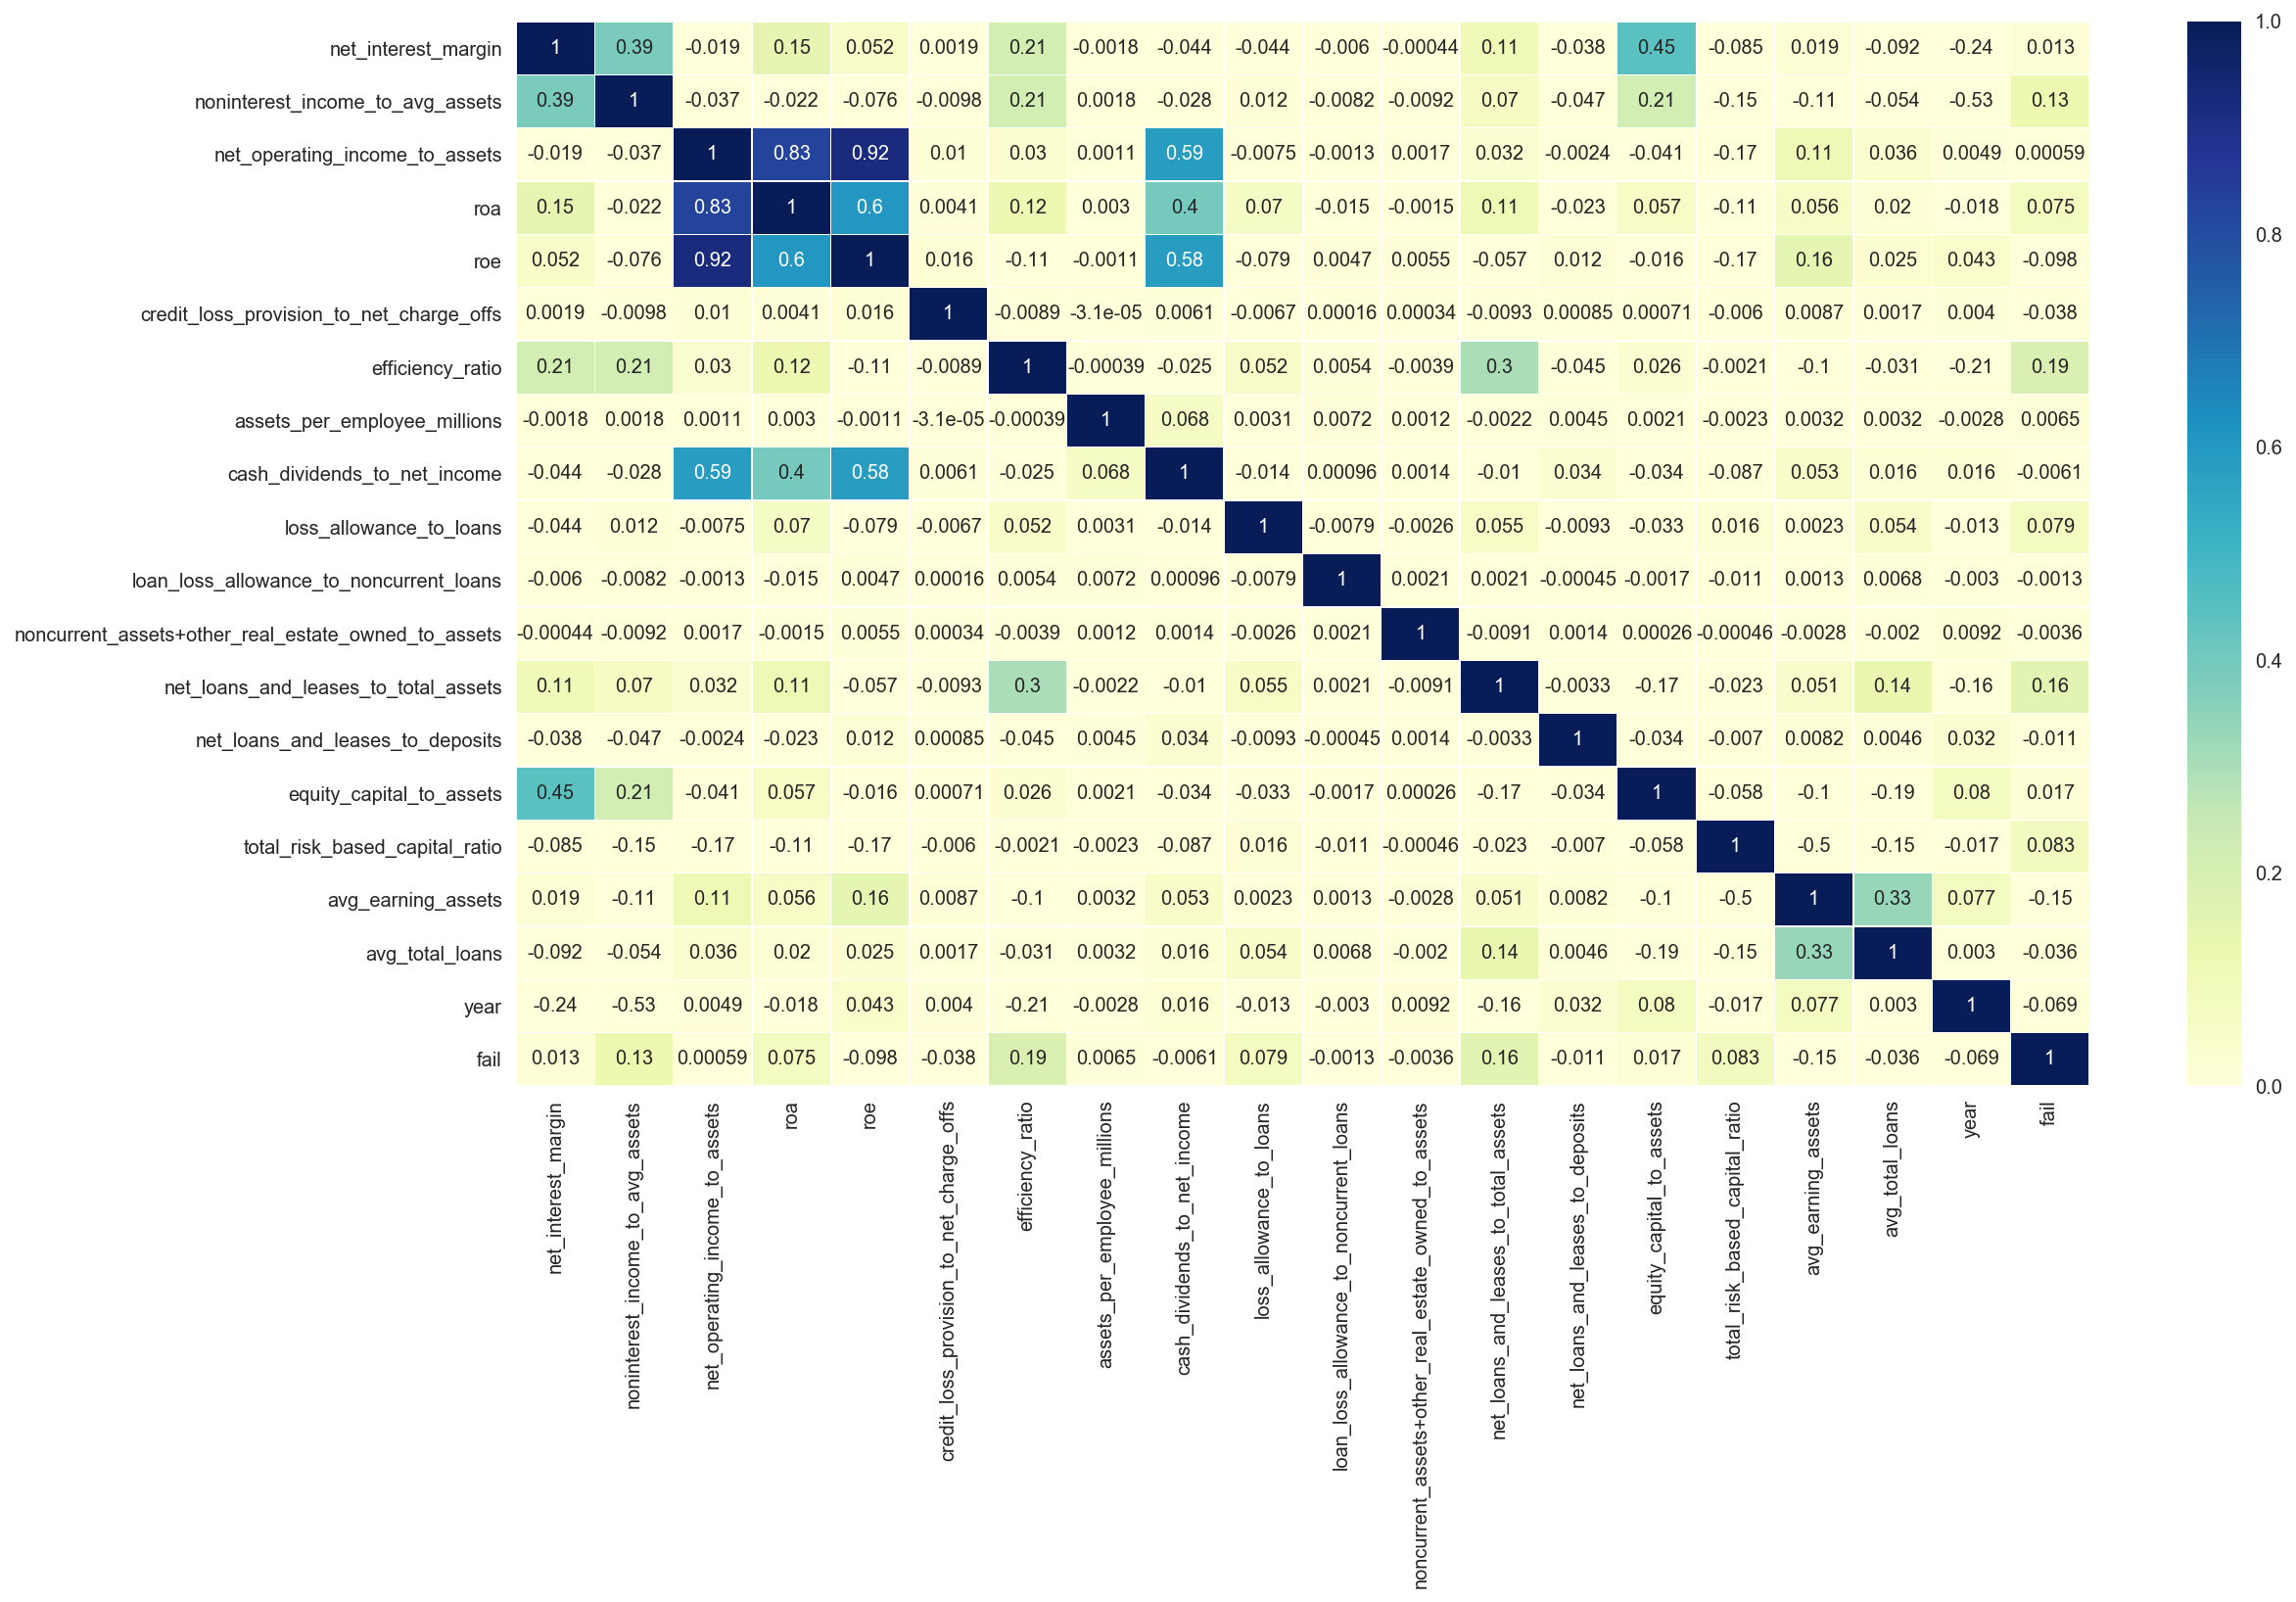

In [31]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df1.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

The following function will give the distribution of variables of interest.

In [32]:
#Ref: Class notebook on Full Analysis

def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')

    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Following graphs of distribution are of the major indicators of a banks performance and financial stability:
1. Return on Assets
2. Return on Equity
3. Credit Loss Provision
4. Efficiency Ratio
5. Loss Allowance
6. Loans and leases to Assets

Observation: Except for 'Efficiency Ratio' and 'Loass Allowance' all the remaining 4 features have Skewed distribution.
1. ROA,ROE and Loans and leases to total assets  have Right skweness
2. Credit Loss Provision has left skewed distribution
While specifying a model for prediction I'll use normalization as most of the freatures have skewness and also outliers.

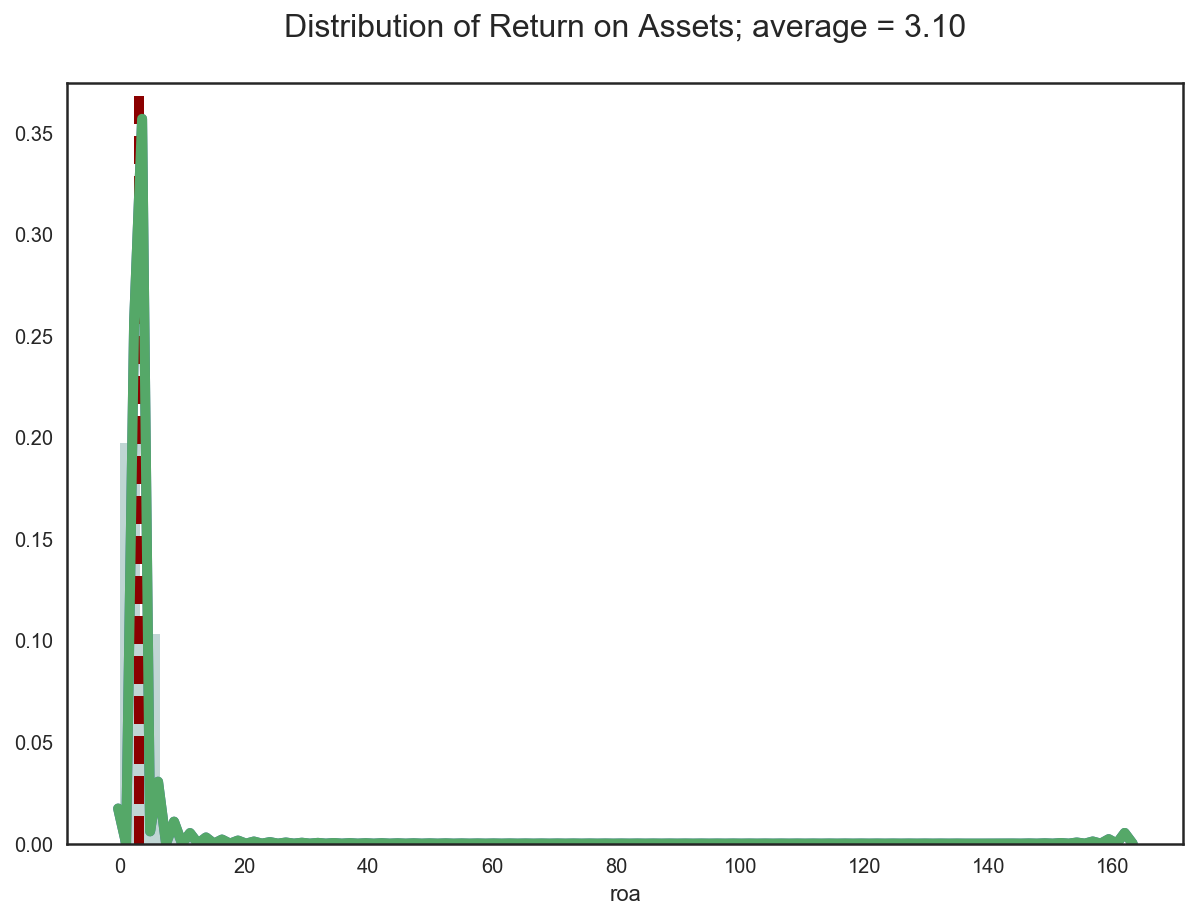

In [33]:
histogram_plotter("Return on Assets", df1.roa)

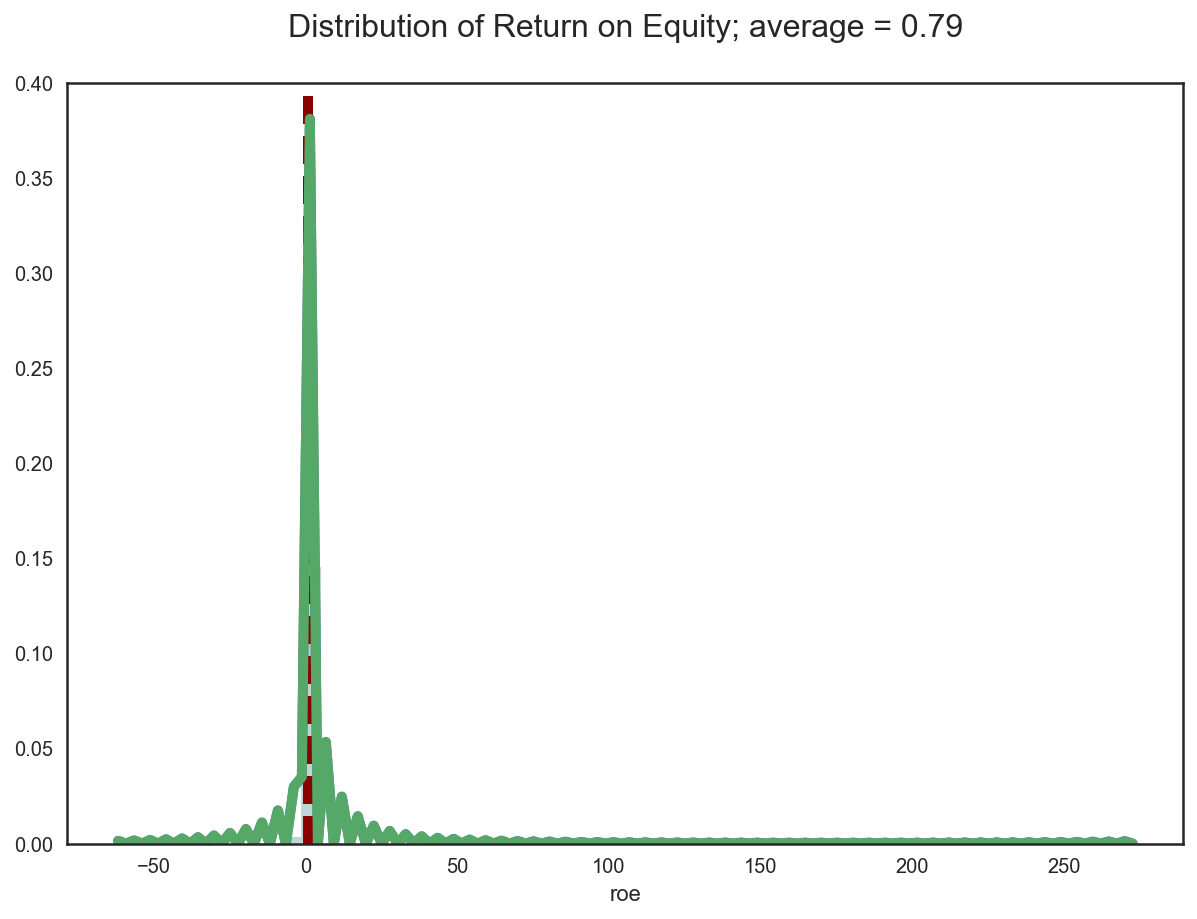

In [34]:
histogram_plotter("Return on Equity", df1.roe)

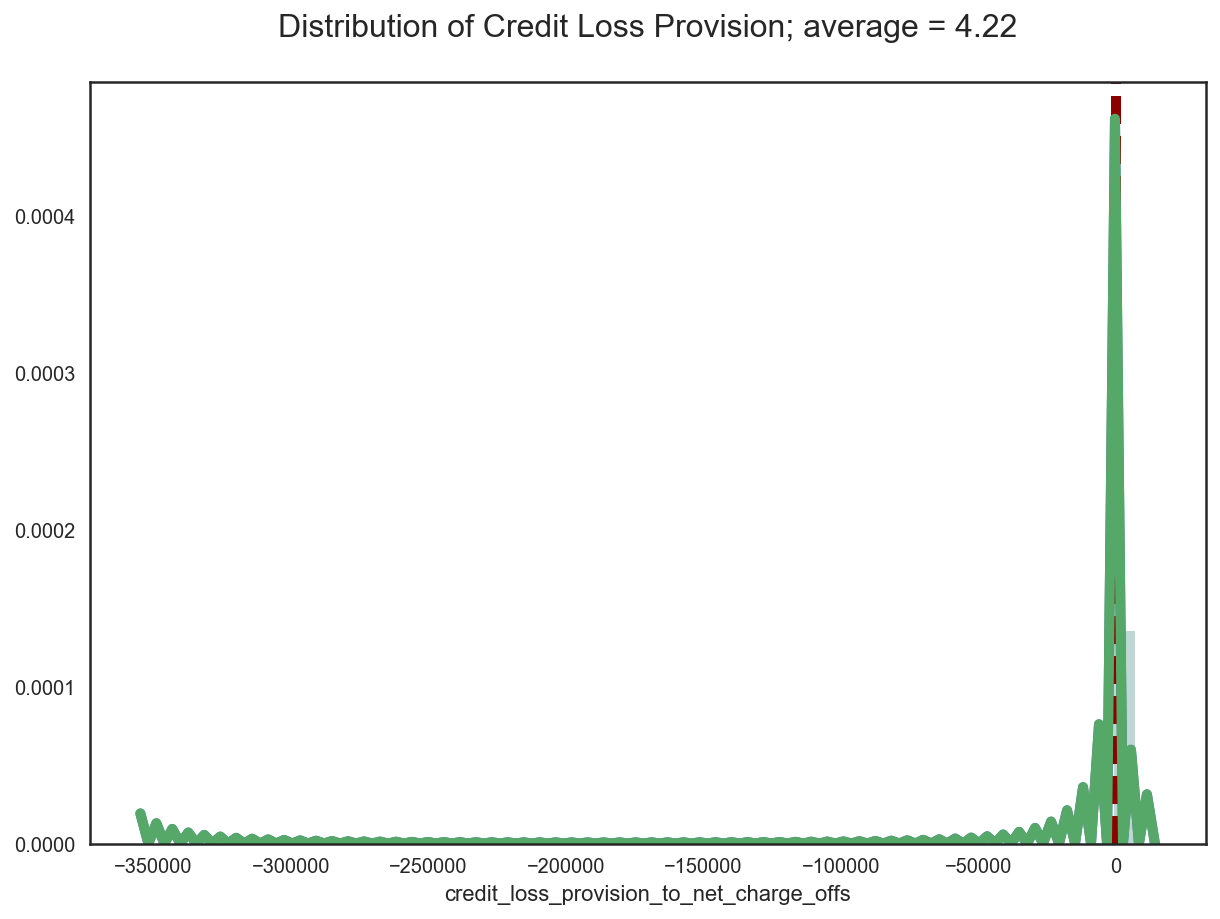

In [35]:
histogram_plotter("Credit Loss Provision", df1.credit_loss_provision_to_net_charge_offs)

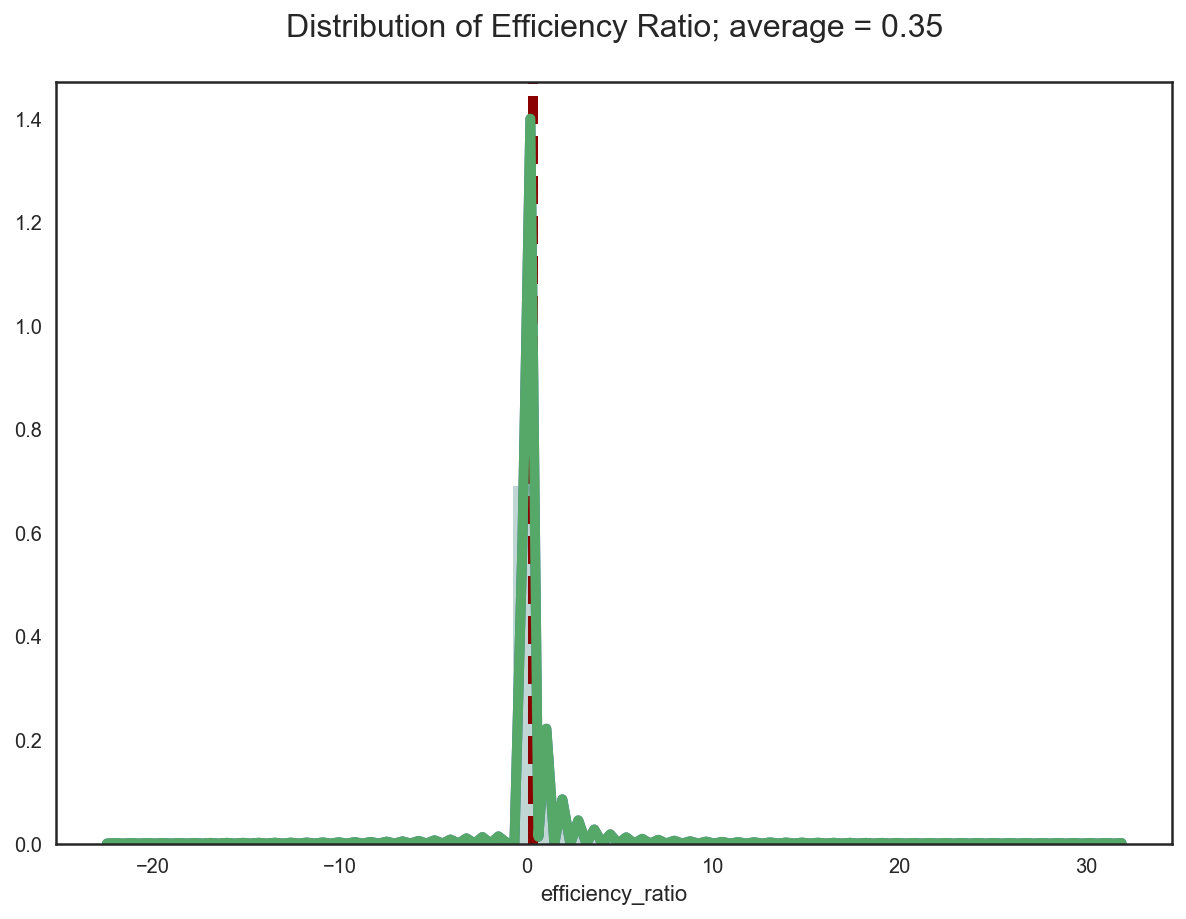

In [36]:
histogram_plotter("Efficiency Ratio", df1.efficiency_ratio)

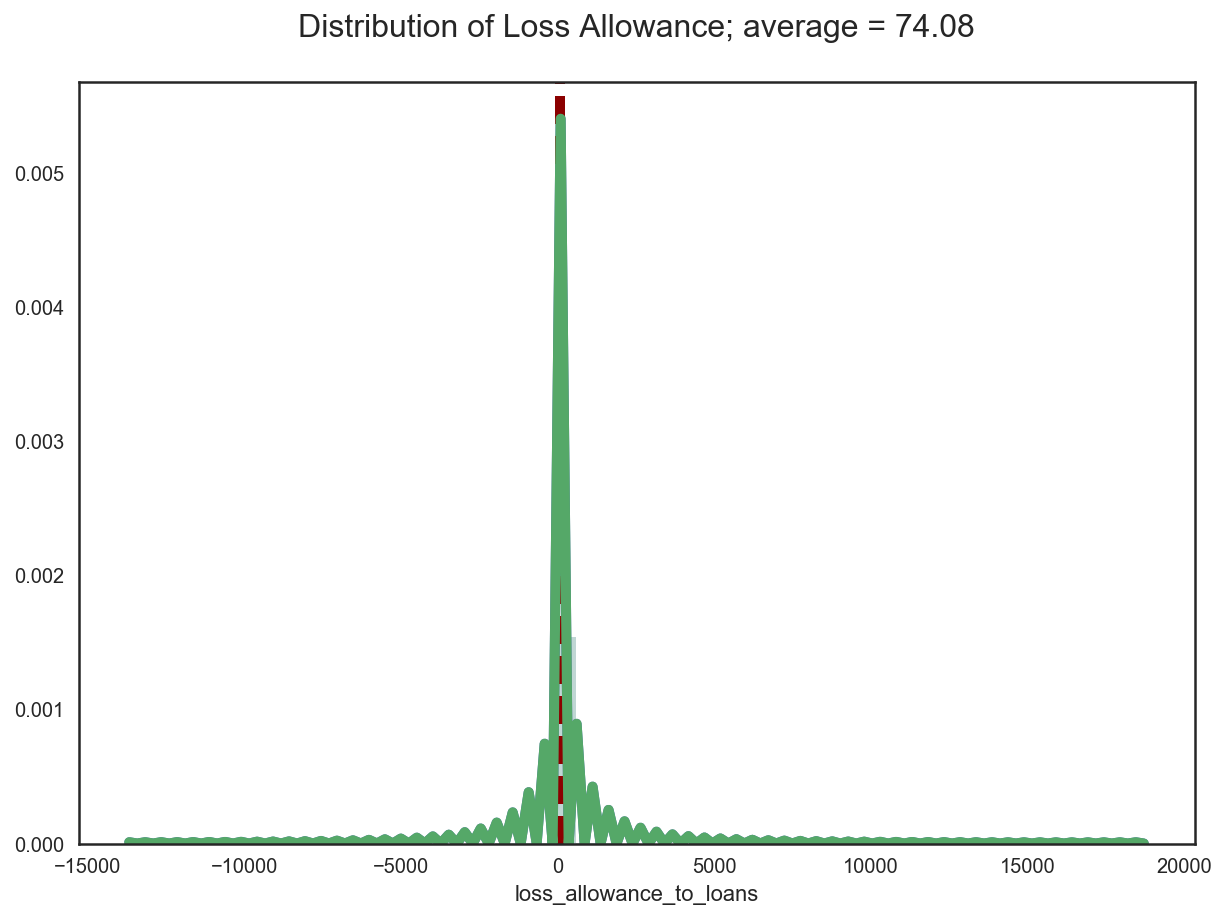

In [37]:
histogram_plotter("Loss Allowance", df1.loss_allowance_to_loans)

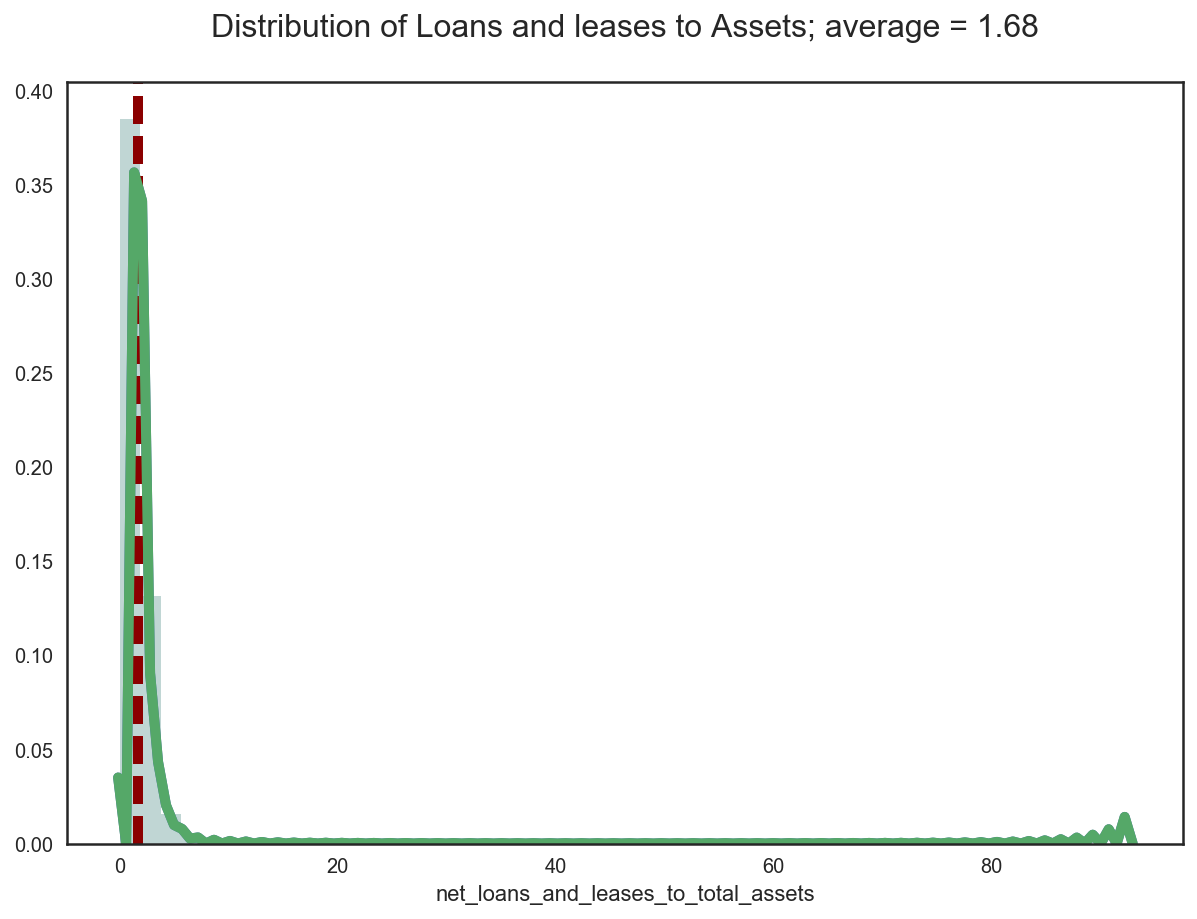

In [38]:
histogram_plotter("Loans and leases to Assets", df1.net_loans_and_leases_to_total_assets)

Since I have panel data I am also going to look at the change in financial performance measures of banks over the period of time. The below graphs explore the change in certian features over a period of 2011-2016.

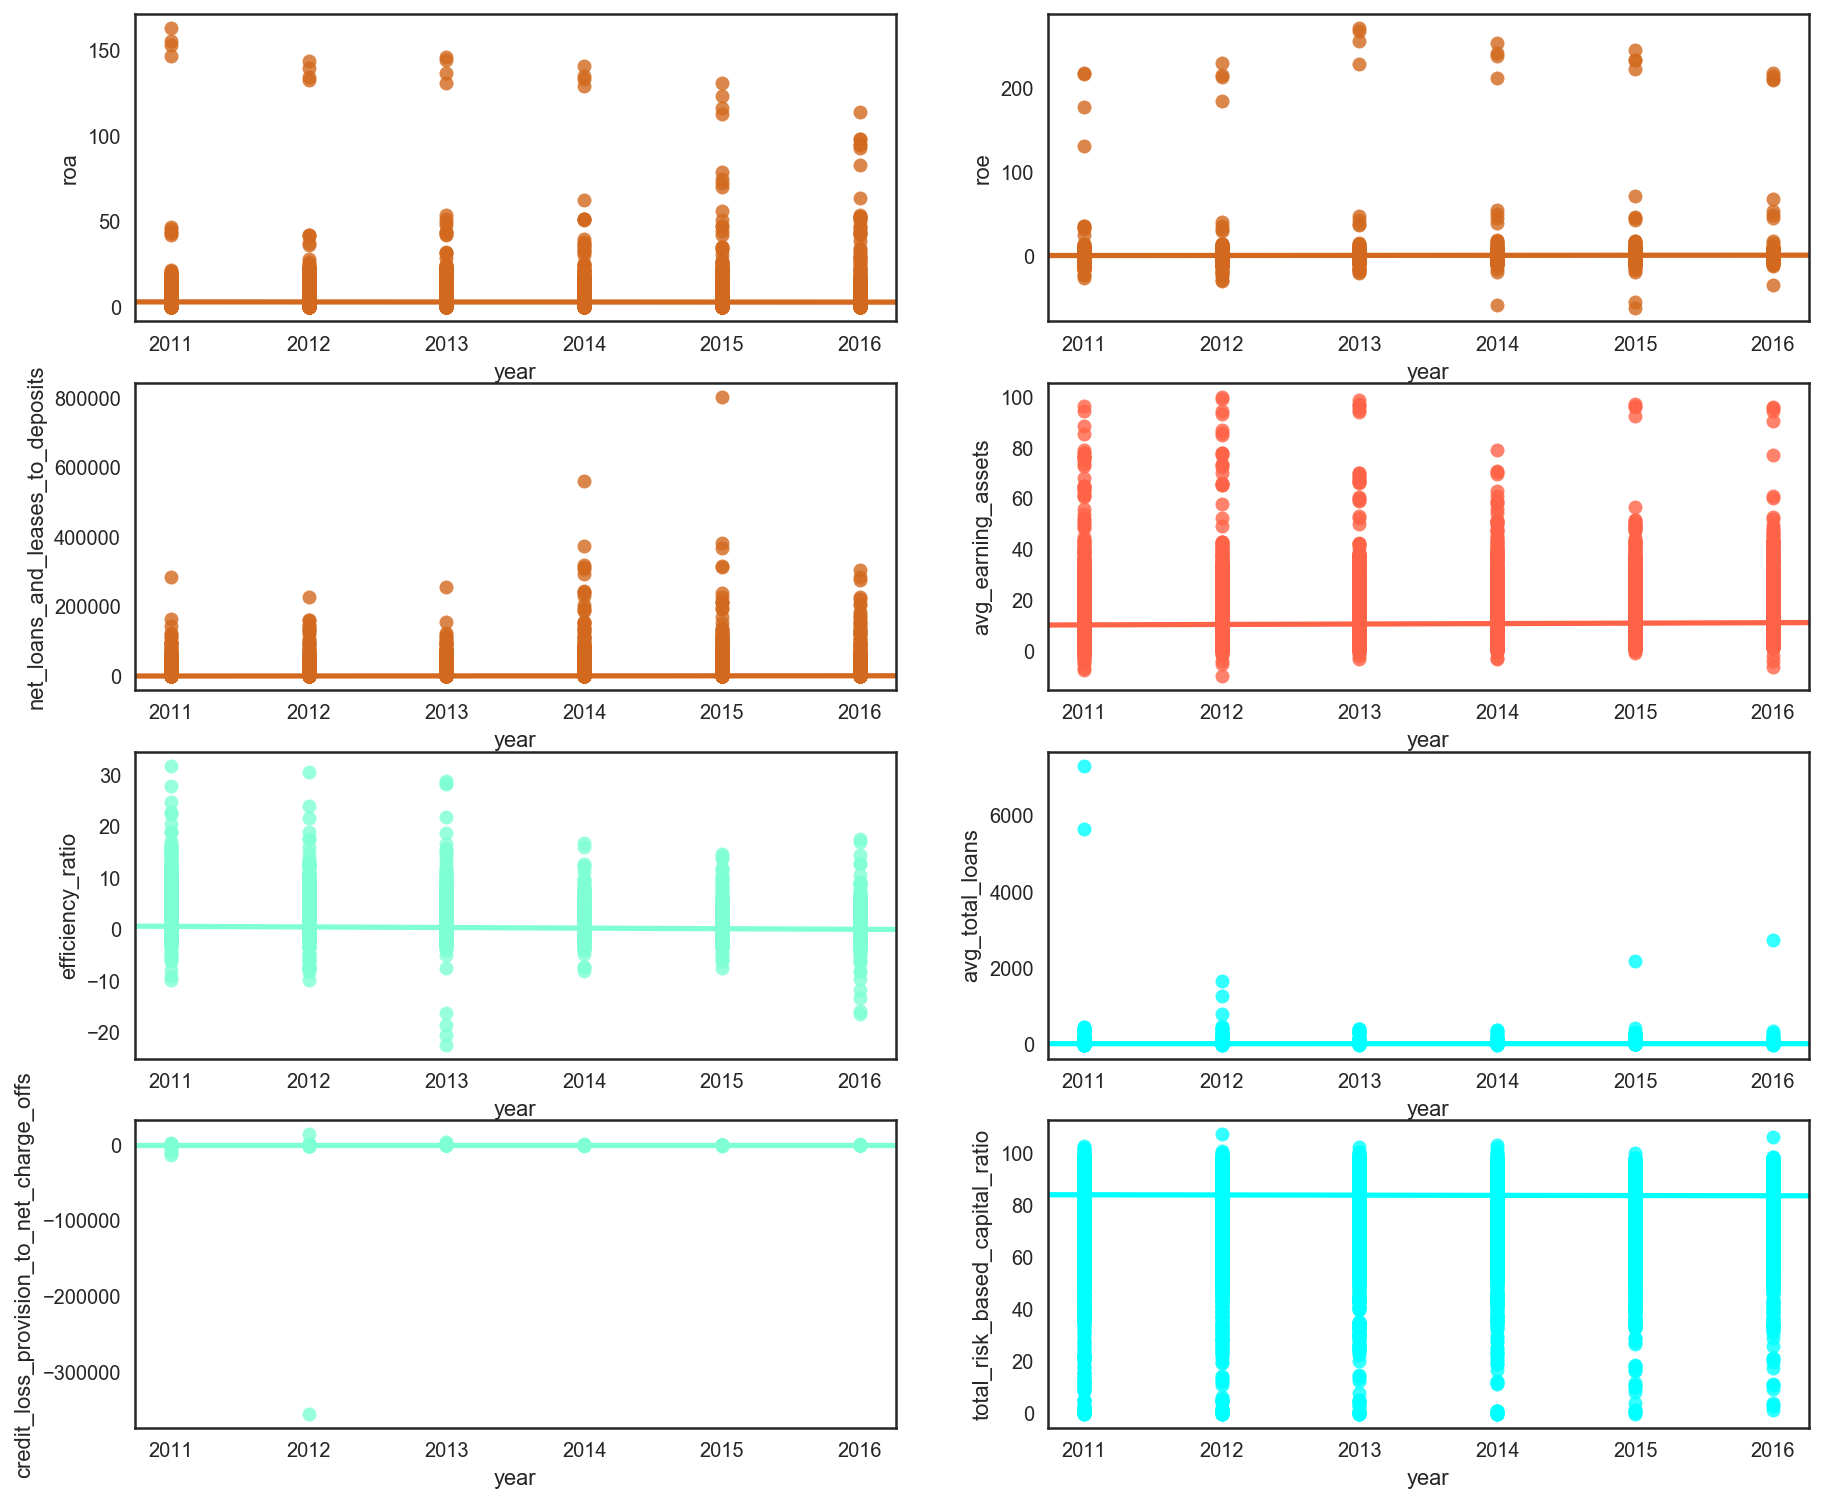

In [43]:
fig, axarr = plt.subplots(4, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.regplot(df1.year,
                       df1.roa, ax=axarr[0,0], color='chocolate')

axarr[0,1] = sns.regplot(df1.year,
                       df1.roe, ax=axarr[0,1], color='chocolate')       
                          
axarr[1,0] = sns.regplot(df1.year,
                       df1.net_loans_and_leases_to_deposits, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(df1.year,
                       df1.avg_earning_assets, ax=axarr[1,1], color='tomato')

axarr[2,0] = sns.regplot(df1.year,
                       df1.efficiency_ratio, ax=axarr[2,0], color='aquamarine')

axarr[2,1] = sns.regplot(df1.year,
                       df1.avg_total_loans, ax=axarr[2,1], color='cyan')

axarr[3,0] = sns.regplot(df1.year,
                       df1.credit_loss_provision_to_net_charge_offs, ax=axarr[3,0], color='aquamarine')

axarr[3,1] = sns.regplot(df1.year,
                       df1.total_risk_based_capital_ratio, ax=axarr[3,1], color='cyan')

plt.show()

I have included the analysis of the above charts in my final Report as it goes well with the classification Analysis.